# Module 5 Final Project Submission

Please fill out:
* Student name: Fernando Aguilar Islas
* Student pace: Part-time
* Scheduled project review date/time: TBD
* Instructor name: Brandon Lewis
* Blog post URL: TBD


## 1. Introduction

## 2 Framework
For this data set I will first perform exploration and data analysis, since all variables are categorical, I will mostly look for missing values and the content of each feature. Next, I will fit single model classifiers such as KNN, support vectors and decision trees. I will also tune the hyperparameters to obtain the best results. Further, I will look into ensembles such as Bagging, Random Forests,and XGBoost, to see if they outperform the single model classifier. Since ideally the classifier could be used as an app for people pacticing outdoor activities, I will prefer single model classifiers that require less memory capacity and not very computationally expensive. Let's start by importing the necessary libraries for the project.

### 2.1 Import Required Libraries

In [1]:
# EDA tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Single model classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

#Ensemble classifications models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb

#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve, auc,f1_score

# Hyperparameter tunning and pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## 2.2 Helper Functions

In [2]:
def best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=10):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

## 3. EDA and Pre-processing


In [3]:
#Load the file into a pandas data frame.
data = pd.read_csv("online_shoppers_intention.csv")
#Get structural information of the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [10]:
#Visualize first 5 rows of data of the first 9 columns.
data.head().iloc[:,:9]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0


In [11]:
#Visualize first 5 rows of data of the remaining columns.
data.head().iloc[:,9:]

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
#Look for missing values.
data.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

False    10422
True      1908
Name: Revenue, dtype: int64


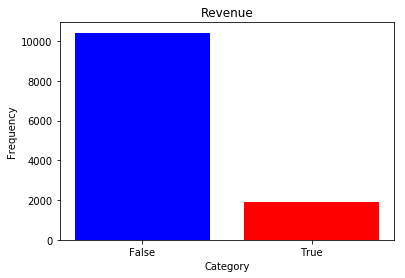

In [16]:
#Visualize distribution of the target variable in the dataset
print(data['Revenue'].value_counts())
plt.bar(['False','True'], data['Revenue'].value_counts(), color=['b','r'])
plt.title('Revenue')
plt.ylabel('Frequency')
plt.xlabel('Category')
plt.show();

In [18]:
#Split the dataset into target and features dataframes.
data['Revenue'] = data['Revenue'].map({'False': 0, 'True': 1})
target = data['Revenue']
features = data.drop('Revenue', axis=1)

In [19]:
#Drop veil-type from the features.
#features.drop('veil-type', axis=1, inplace=True)

#One-hot-code the features
ohc_feats = pd.get_dummies(features, drop_first=True)
print('New number of columns: ', ohc_feats.columns.shape[0])
ohc_feats.columns

New number of columns:  26


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

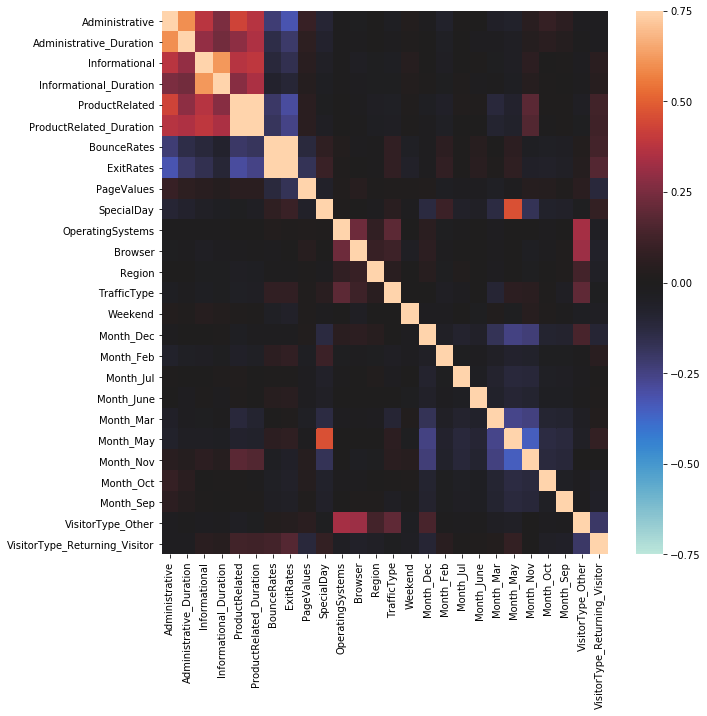

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(ohc_feats.corr(),vmin=-0.75,vmax=0.75,center=0);

In [30]:
pca = PCA(n_components=0.9)
pca_feats = pca.fit_transform(ohc_feats)
print(np.sum(pca.explained_variance_ratio_))
pca.n_components_

0.9877351180787426


1

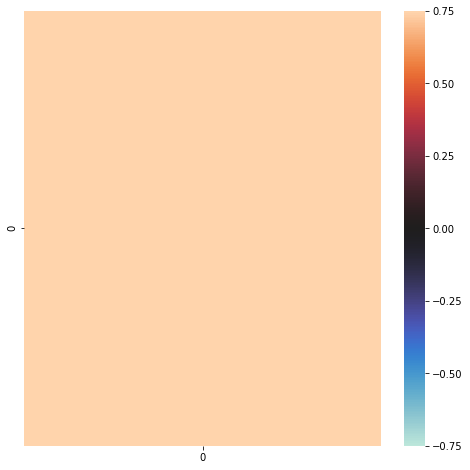

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.DataFrame(pca_feats).corr(),vmin=-0.75,vmax=0.75,center=0);

In [35]:
X_train, X_test, y_train, y_test = train_test_split(ohc_feats,target,test_size=0.3,random_state=617)

In [34]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)
def print_metrics(labels, preds):
    #print("Precision Score: {}".format(precision_score(labels, preds)))
    #print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
find_best_k(X_train, y_train, X_test, y_test)

NameError: name 'find_best_k' is not defined

## 7. Bibliography and References
* Dataset: Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). https://link.springer.com/article/10.1007%2Fs00521-018-3523-0